<a href="https://colab.research.google.com/github/haribharadwaj/notebooks/blob/main/BME511/NonStationary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of non-stationary signals

We will trivially extend our spectral estimation approaches from stationary to non-stationary signals by asserting that our signals are piecewise stationary (i.e., stationary over small windows). That gives us a basic spectrogram. Then we see that the time-frequency uncertainty can be shaped is other ways, naturally leading to wavelet-based analyses.

## Possible time-frequency tilings: Spectrogram

With spectrograms the time-frequency resolution is fixed throughout the space, but time vs. frequency localization trafeoffs still possible. Also possible is bias-variance tradeoff (e.g., using multitaper or Welch)

![Tiling for spectrograms](tiling.png)

## Possible time-frequency tilings: Wavelets

With wavelet-based analysis, the time-frequency resolution is progressively altered from high- to low-frequencies such that a single wavelet shape is is being dilated to analyze the signal at various "scales". This is as if a filterbank is used to analyze the signal where the sharpness (i.e., quality factor, or the ratio between center-frequency and bandwidth) is constant.

![Tiling for wavelets](wavelettiling.png)

In [1]:
import numpy as np
import pylab as pl

# Setting it so figs will be a bit bigger
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [5, 3.33]
plt.rcParams['figure.dpi']  = 120

In [2]:
# Simple white noise example
fs = 1024
N = 1024  # 1 second duration
x = np.random.randn(N)

In [3]:
import tfr
freqs = np.arange(20, 500, 5)
n_cycles = 7
psd, t = tfr.tfr_multitaper(x[None, None, :], fs, frequencies=freqs,
                            time_bandwidth=2., n_cycles=n_cycles)

Data is 1 trials and 1 channels
Multitaper time-frequency analysis for 96 frequencies
Using 1 tapers


Text(0, 0.5, 'Frequency (Hz)')

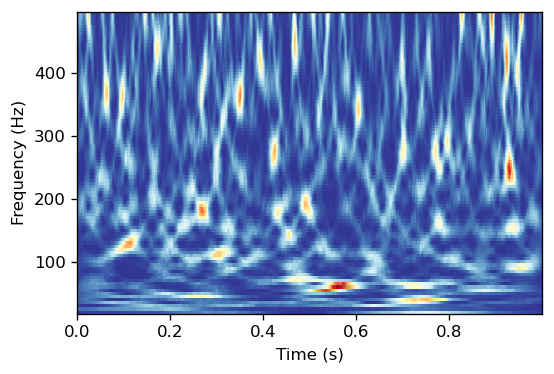

In [4]:
pl.pcolormesh(t, freqs, psd.squeeze(), cmap='RdYlBu_r', shading='auto')
pl.xlabel('Time (s)')
pl.ylabel('Frequency (Hz)')

## An example of a non-stationary where the structure is not obvious in the time domain

Text(0, 0.5, 'x(t)')

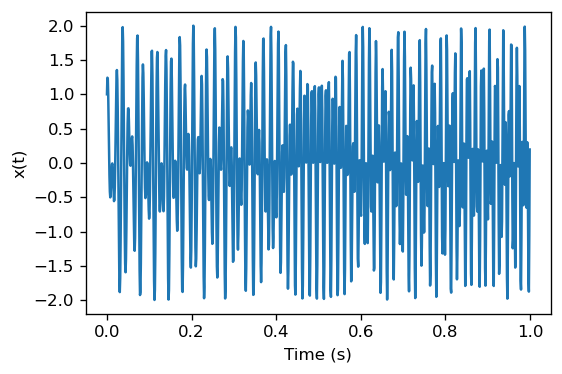

In [5]:
fs = 1024
t = np.arange(0, 1., 1/fs)
x = np.cos(2*np.pi*(80 + 40*t)*t) + np.sin(2*np.pi*60*t)
pl.plot(t, x)
pl.xlabel('Time (s)')
pl.ylabel('x(t)')

Data is 1 trials and 1 channels
Multitaper time-frequency analysis for 90 frequencies
Using 1 tapers


Text(0, 0.5, 'Frequency (Hz)')

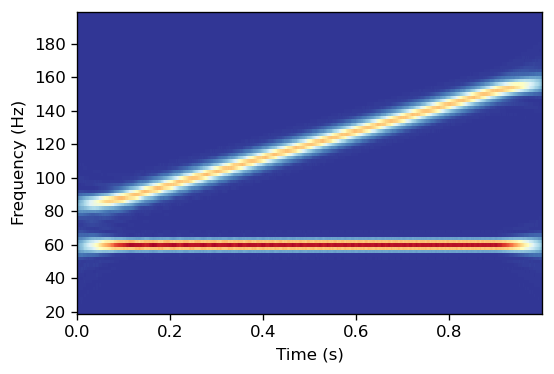

In [6]:
freqs = np.arange(20, 200, 2)
n_cycles = 0.2 * freqs
time_bandwidth = 2
psd, t = tfr.tfr_multitaper(x[None, None, :], fs, frequencies=freqs,
                            time_bandwidth=time_bandwidth, n_cycles=n_cycles)

pl.pcolormesh(t, freqs, psd.squeeze(), cmap='RdYlBu_r', shading='auto')
pl.xlabel('Time (s)')
pl.ylabel('Frequency (Hz)')

## Speech Example

Text(0, 0.5, 'Sound Pressure (arbitrary units)')

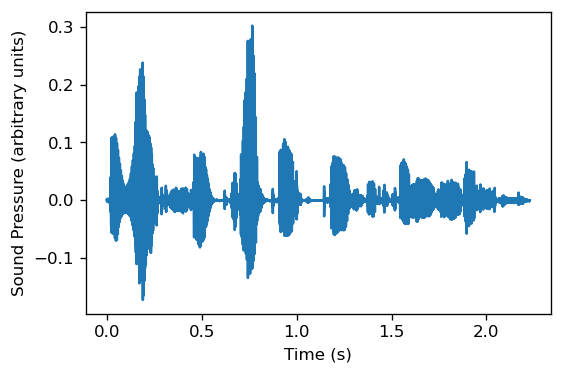

In [7]:
from scipy import io
dat = io.loadmat('whitesilk.mat', squeeze_me=True)

x = dat['x']
fs = dat['fs']
t = np.arange(0, x.shape[0]) / fs
pl.plot(t, x)
pl.xlabel('Time (s)')
pl.ylabel('Sound Pressure (arbitrary units)')

Data is 1 trials and 1 channels
Multitaper time-frequency analysis for 149 frequencies
Using 1 tapers


Text(0, 0.5, 'Frequency (Hz)')

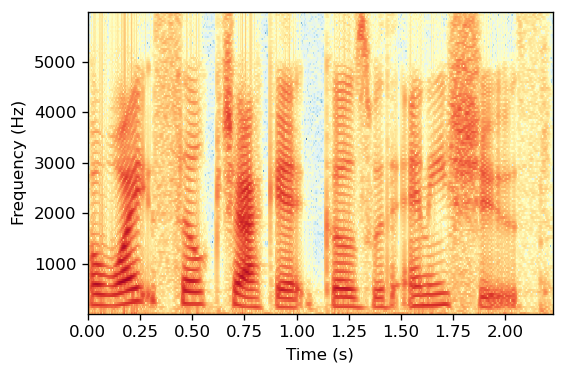

In [8]:
freqs = np.arange(40, 6000, 40)
n_cycles = 0.025 * freqs  # 25 ms windows
time_bandwidth = 2
psd, t = tfr.tfr_multitaper(x[None, None, :], fs, frequencies=freqs,
                            time_bandwidth=time_bandwidth, n_cycles=n_cycles)

pl.pcolormesh(t, freqs, 10 * np.log10(psd.squeeze()), cmap='RdYlBu_r', shading='auto')
pl.xlabel('Time (s)')
pl.ylabel('Frequency (Hz)')

## Non-stationary example with two bursts

This example can be used to better understand time-frequency uncertainty and shaping it in various ways.

Text(0, 0.5, 'x(t)')

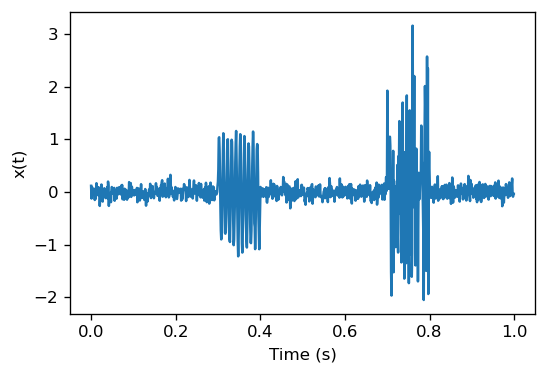

In [9]:
fs = 1024
t = np.arange(0, 1., 1/fs)

x = (np.sin(2*np.pi*100*t) * ((t > 0.3) & (t < 0.4)) +
     np.random.randn(t.shape[0]) * ((t > 0.7) & (t < 0.8)) +
     np.random.randn(t.shape[0])*0.1)

pl.plot(t, x)
pl.xlabel('Time (s)')
pl.ylabel('x(t)')

Data is 1 trials and 1 channels
Multitaper time-frequency analysis for 96 frequencies
Using 1 tapers


Text(0, 0.5, 'Frequency (Hz)')

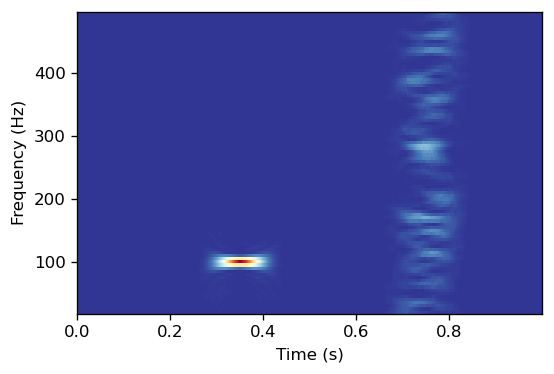

In [10]:
freqs = np.arange(20, 500, 5)
n_cycles = 0.1 * freqs
time_bandwidth = 2
psd, t = tfr.tfr_multitaper(x[None, None, :], fs, frequencies=freqs,
                            time_bandwidth=time_bandwidth, n_cycles=n_cycles)

pl.pcolormesh(t, freqs, psd.squeeze(), cmap='RdYlBu_r', shading='auto')
pl.xlabel('Time (s)')
pl.ylabel('Frequency (Hz)')